# TalentSprint

## Objectives

At the end of the experiment, you will be able to

* understand how to extract features using pca
* apply pca on any dataset to extract meaningful features from it

## Dataset

The dataset choosen for this experiment is wild faces dataset.

**Import Libraries**

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [9]:
XX = np.array([[-1, -1,3], [-2, -1, 5], [-3, -2, 3], [1, 1, 0], [2, 1, -1], [3, 2, 3]])
XX_reduced=PCA(n_components=1, whiten=False).fit_transform(XX)
print(XX_reduced)
XX_reduced=PCA(n_components=1, svd_solver='randomized', whiten=True).fit_transform(XX)
print(XX_reduced)

[[-1.61153188]
 [-3.41804324]
 [-3.46623797]
 [ 2.34721994]
 [ 3.60196525]
 [ 2.54662789]]
[[-0.50329039]
 [-1.06747396]
 [-1.08252544]
 [ 0.73304987]
 [ 1.12491383]
 [ 0.79532608]]


In [10]:

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
print(X.shape)
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
print(y.shape)
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("h: %d w:%d" % (h,w))

(1288, 1850)
(1288,)
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
h: 50 w:37


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(966, 1850)
(322, 1850)


In [13]:

#
# On calcule et on enlève l'image moyenne 
#
nb_train_images = X_train.shape[0]
meanFace = np.zeros(X_train[0].shape)

for image in X_train:
  meanFace += 1/nb_train_images * image

X_train2 = [ image - meanFace for image in X_train ] 

print(len(X_train2))

966


In [16]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(X_train2)
print(pca.components_.shape)
eigenfaces = pca.components_.reshape((150, h, w))
print(eigenfaces.shape)

(150, 1850)
(150, 50, 37)


In [17]:

print("Projecting X_train2 on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train2)

Projecting X_train2 on the eigenfaces orthonormal basis


In [18]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

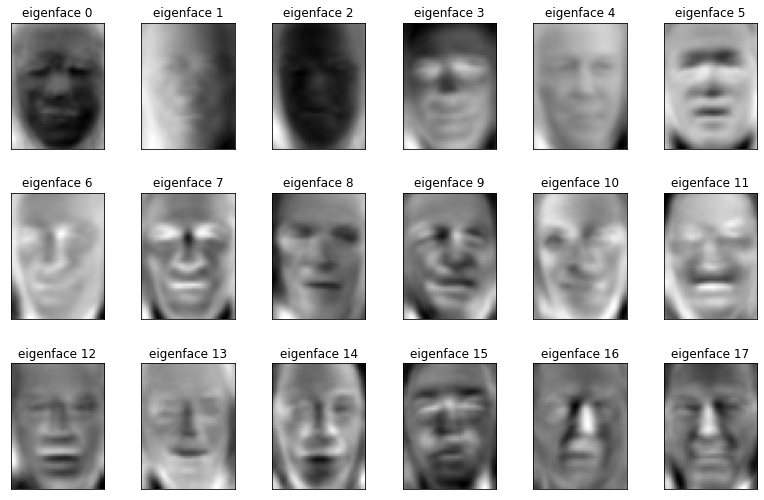

In [19]:

# plot the gallery of the most significative eigenfaces
import matplotlib.pyplot as plt

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()